# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Business Objectives 
Recommendation to buy a used car

There are several factor that make car more or less expensive :
1. Condition
3. Cylinders
4. Fuel
5. Odometer
6. Title_status
7. Type
8. Size

Data Mining Goals:
What factors make car more or less expensive ?

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Import Library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams["figure.figsize"] = (15,9)
plt.style.use("fivethirtyeight")

# prepare data
from sklearn.model_selection import train_test_split

# model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

Data Description

In [2]:
df = pd.read_csv('data/vehicles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [5]:
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
318619,7308007963,eugene,21587,2016.0,toyota,rav4,NaN,4 cylinders,gas,93987.0,clean,automatic,2T3DFREV8GW453944,NaN,NaN,SUV,black,or
88438,7316368241,"washington, DC",32000,2019.0,toyota,highlander,NaN,NaN,gas,32860.0,clean,automatic,5TDBZRFHXKS747234,4wd,NaN,SUV,blue,dc
382132,7311907104,san antonio,0,2017.0,nissan,rogue s,excellent,4 cylinders,gas,92706.0,clean,automatic,KNMAT2MV8HP503629,4wd,sub-compact,SUV,grey,tx
58858,7314978357,santa barbara,57000,2020.0,rover,NaN,like new,4 cylinders,gas,2200.0,clean,automatic,SALEK7EX9L2019825,4wd,full-size,SUV,blue,ca
234896,7312341770,eastern NC,5000,1987.0,toyota,pickup,NaN,NaN,gas,288000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,nc
46947,7310941134,redding,22995,2017.0,ford,explorer xlt 4wd,NaN,NaN,gas,99653.0,clean,automatic,NaN,4wd,NaN,SUV,NaN,ca
261748,7310389089,albuquerque,16999,2015.0,subaru,crosstrek limited,NaN,4 cylinders,gas,87600.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,nm
118823,7313687254,tampa bay area,6000,2004.0,ford,expedition,excellent,8 cylinders,gas,170000.0,clean,other,NaN,rwd,NaN,NaN,blue,fl
75026,7304263139,colorado springs,5500,1966.0,ford,thunderbird,fair,NaN,gas,10029.0,clean,automatic,6Y87Z158045,rwd,NaN,coupe,brown,co
322407,7316810317,portland,73990,2020.0,cadillac,escalade 4dr premium,NaN,8 cylinders,gas,18708.0,clean,automatic,1GYS4CKJ2LR276856,4wd,NaN,SUV,NaN,or


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Data Cleaning

In [6]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower() # lowercase
df.columns = df.columns.str.strip() # whitespace
df.columns = df.columns.str.replace(" ", "_") # replace with _

In [8]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [9]:
# Attempting to clean and convert the 'cylinders' column to integers
# Stripping non-numeric characters and converting to numeric
df['cylinders'] = df['cylinders'].str.extract('(\d+)')  # Extract numeric part
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce').astype('Int64')  # Convert to integer with null handling

# Confirming the change
df.dtypes['cylinders']


Int64Dtype()

In [10]:
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,state
262569,7303012293,las cruces,17590,2011.0,infiniti,g g37x coupe 2d,good,6,gas,74177.0,clean,other,JN1CV6EL8BM260536,NaN,NaN,coupe,black,nm
166082,7312969894,"kansas city, MO",49995,2019.0,chevrolet,silverado 3500 ltz,NaN,8,diesel,127568.0,clean,automatic,1GC4KXEY2KF153627,NaN,NaN,truck,NaN,ks
314971,7315763915,east oregon,22995,2013.0,ford,f-150,NaN,6,gas,127717.0,clean,automatic,1FTFW1ET3DFD13788,4wd,NaN,truck,blue,or
16960,7311191335,yuma,45995,2015.0,ford,f-250 super duty xlt,NaN,8,other,107971.0,clean,automatic,1FT7W2BTXFEA63599,4wd,NaN,pickup,white,az
298847,7310962067,dayton / springfield,20990,2014.0,honda,civic si coupe 2d,good,<NA>,other,31605.0,clean,other,2HGFG4A52EH702848,NaN,NaN,coupe,white,oh


In [11]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Calculating the numerical value for 'year' as the age of the vehicle
df['year'] = 2024 - df['year']

# Dropping rows where the age is greater than 30
vehicles_df = df[df['year'] <= 30]

In [12]:
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,state
33751,7316462801,los angeles,17990,9.0,ford,e-series chassis 14 feet box,NaN,8,gas,166745.0,clean,automatic,1FDWE3FLXFDA15620,rwd,NaN,other,white,ca
96218,7306585422,ft myers / SW florida,29900,6.0,dodge,grand caravan sxt,excellent,6,gas,47916.0,NaN,automatic,2C4RDGCG5JR325408,NaN,NaN,van,NaN,fl
357109,7314759845,memphis,15592,8.0,nissan,juke,NaN,4,gas,44302.0,clean,automatic,NaN,fwd,compact,wagon,red,tn
305764,7311991564,oklahoma city,11995,8.0,nissan,altima,like new,4,gas,104000.0,clean,automatic,NaN,fwd,NaN,sedan,black,ok
269981,7315343279,hudson valley,1750,19.0,chrysler,pacifica,fair,6,gas,128550.0,clean,automatic,NaN,4wd,NaN,SUV,silver,ny


In [13]:
df.select_dtypes("object").agg(["nunique"])

,region,manufacturer,model,condition,fuel,title_status,transmission,vin,drive,size,type,paint_color,state
nunique,404,42,29649,6,5,6,3,118246,3,4,13,12,51


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     247904 non-null  Int64  
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  vin           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: I

Duplicate Check

In [15]:
sum(df.duplicated())

0

Handle Missing Value

In [16]:
# Check Null Value
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       178976
fuel              3013
odometer          4400
title_status      8242
transmission      2556
vin             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [17]:
df.isnull().mean() * 100 # Percentage of missing values

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.926537
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
vin             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

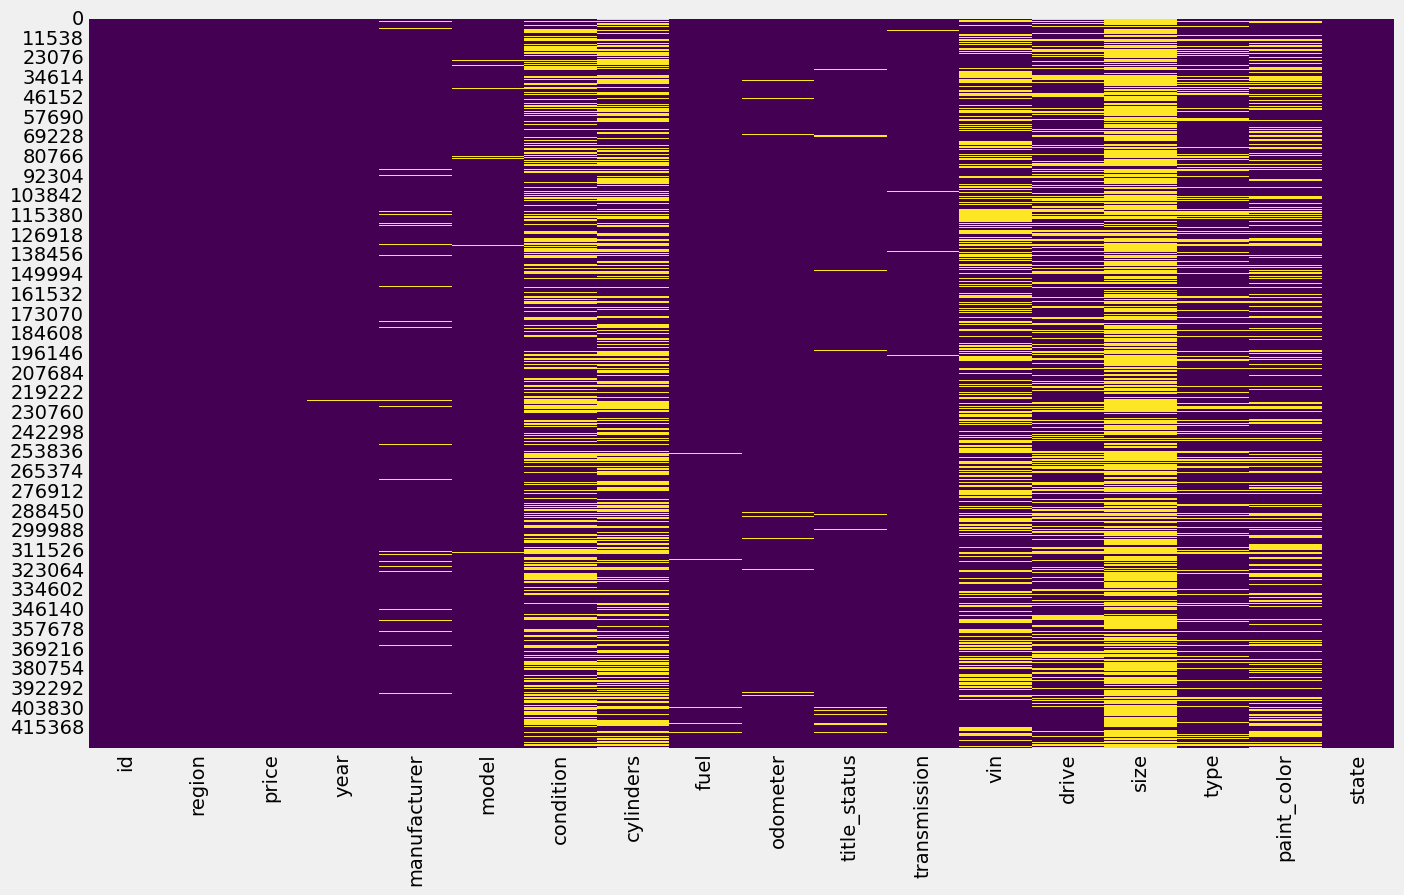

In [18]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

After seeing the column that has a null value, My summary using threshold 50%: 
1. column 'size', 'model', 'vin', 'paint_color', 'state', 'region', 'manufacturer' will be drop 
2. column 'odometer' will use median value 
3. column 'transmission', 'title_status', 'condition', 'fuel', 'cylinders' will use mod value
4. column 'year' drop that has missing value

In [19]:
#Dropping column size
df = df.drop(['size','model', 'vin', 'paint_color', 'state', 'manufacturer', 'region'], axis = 1)
df = df.dropna(subset=['year'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 425675 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            425675 non-null  int64  
 1   price         425675 non-null  int64  
 2   year          425675 non-null  float64
 3   condition     252766 non-null  object 
 4   cylinders     246786 non-null  Int64  
 5   fuel          422930 non-null  object 
 6   odometer      421344 non-null  float64
 7   title_status  417745 non-null  object 
 8   transmission  423187 non-null  object 
 9   drive         295408 non-null  object 
 10  type          333008 non-null  object 
dtypes: Int64(1), float64(2), int64(2), object(6)
memory usage: 39.4+ MB


In [20]:
#Replacing missing value with mean on column odometer
df['odometer'].fillna(df['odometer'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425675 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            425675 non-null  int64  
 1   price         425675 non-null  int64  
 2   year          425675 non-null  float64
 3   condition     252766 non-null  object 
 4   cylinders     246786 non-null  Int64  
 5   fuel          422930 non-null  object 
 6   odometer      425675 non-null  float64
 7   title_status  417745 non-null  object 
 8   transmission  423187 non-null  object 
 9   drive         295408 non-null  object 
 10  type          333008 non-null  object 
dtypes: Int64(1), float64(2), int64(2), object(6)
memory usage: 39.4+ MB


In [21]:
#replacing missing value on column transmission, title_status, condition, fuel, cylinders with mode value
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['title_status'].fillna(df['title_status'].mode()[0], inplace=True)
df['condition'].fillna(df['condition'].mode()[0], inplace=True)
df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)
df['cylinders'].fillna(df['cylinders'].mode()[0], inplace=True)
df['drive'].fillna(df['drive'].mode()[0], inplace=True)
df['type'].fillna(df['type'].mode()[0], inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425675 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            425675 non-null  int64  
 1   price         425675 non-null  int64  
 2   year          425675 non-null  float64
 3   condition     425675 non-null  object 
 4   cylinders     425675 non-null  Int64  
 5   fuel          425675 non-null  object 
 6   odometer      425675 non-null  float64
 7   title_status  425675 non-null  object 
 8   transmission  425675 non-null  object 
 9   drive         425675 non-null  object 
 10  type          425675 non-null  object 
dtypes: Int64(1), float64(2), int64(2), object(6)
memory usage: 39.4+ MB


EDA

In [22]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [23]:
df[['price']].describe()


,price
count,425675.00
mean,75305.64
std,12199512.60
min,0.00
25%,5900.00
50%,13900.00
75%,26000.00
max,3736928711.00


In [24]:
p = [0.05, .85,.95, .99]

In [25]:
df[['price']].describe(p)


,price
count,425675.00
mean,75305.64
std,12199512.60
min,0.00
5%,0.00
50%,13900.00
85%,32990.00
95%,43998.00
99%,66882.08
max,3736928711.00


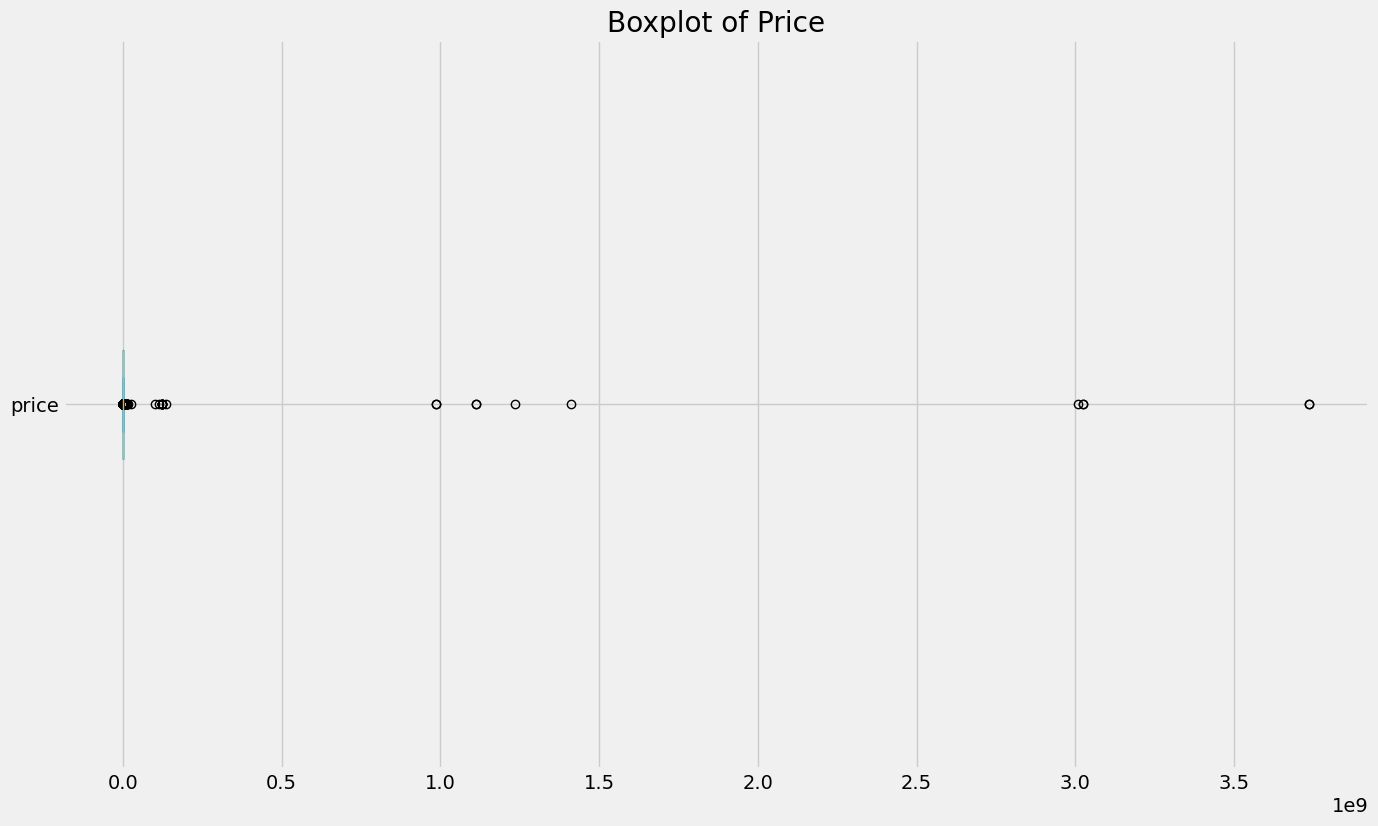

In [26]:
df['price'].plot(kind = 'box', vert = False, title = "Boxplot of Price");

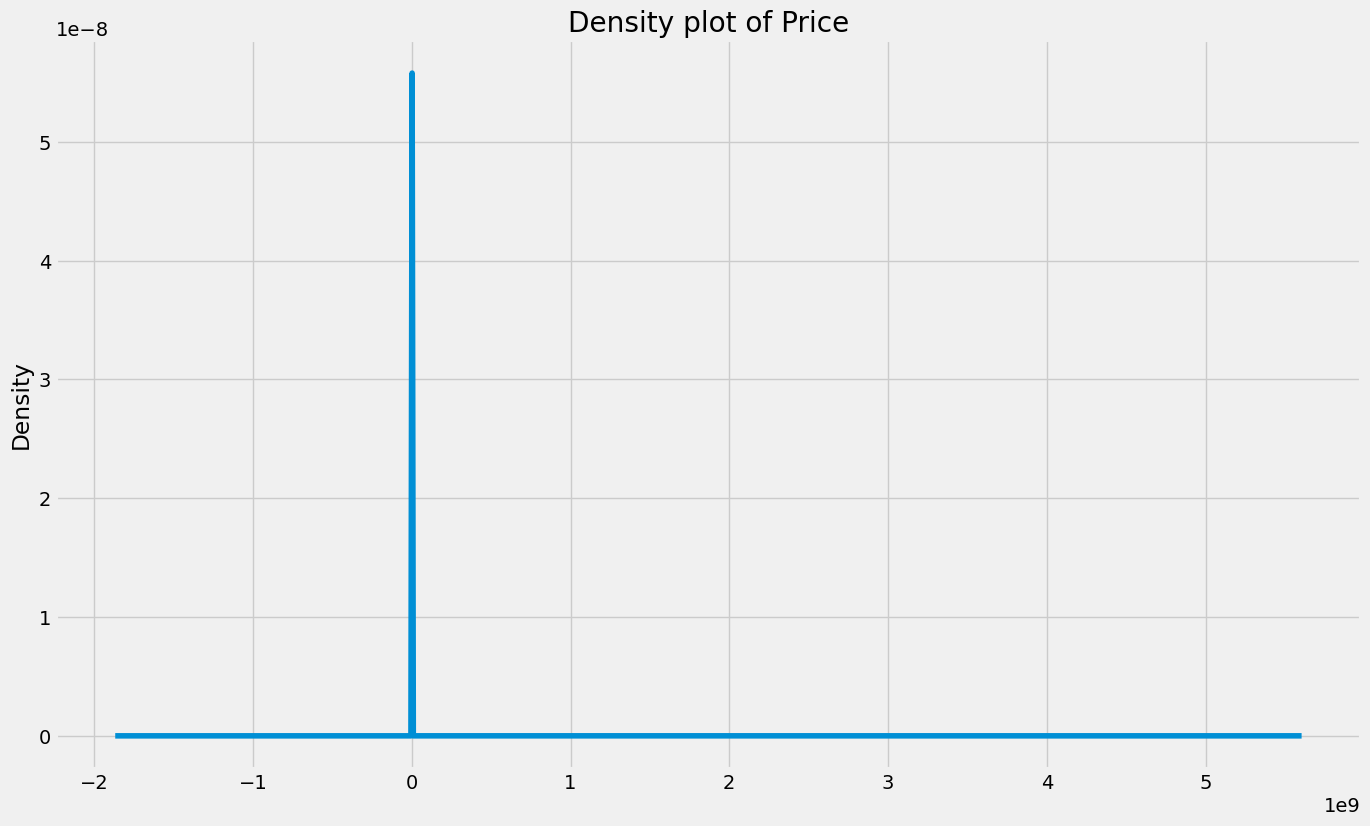

In [27]:
df['price'].plot(kind = 'density', title = "Density plot of Price");


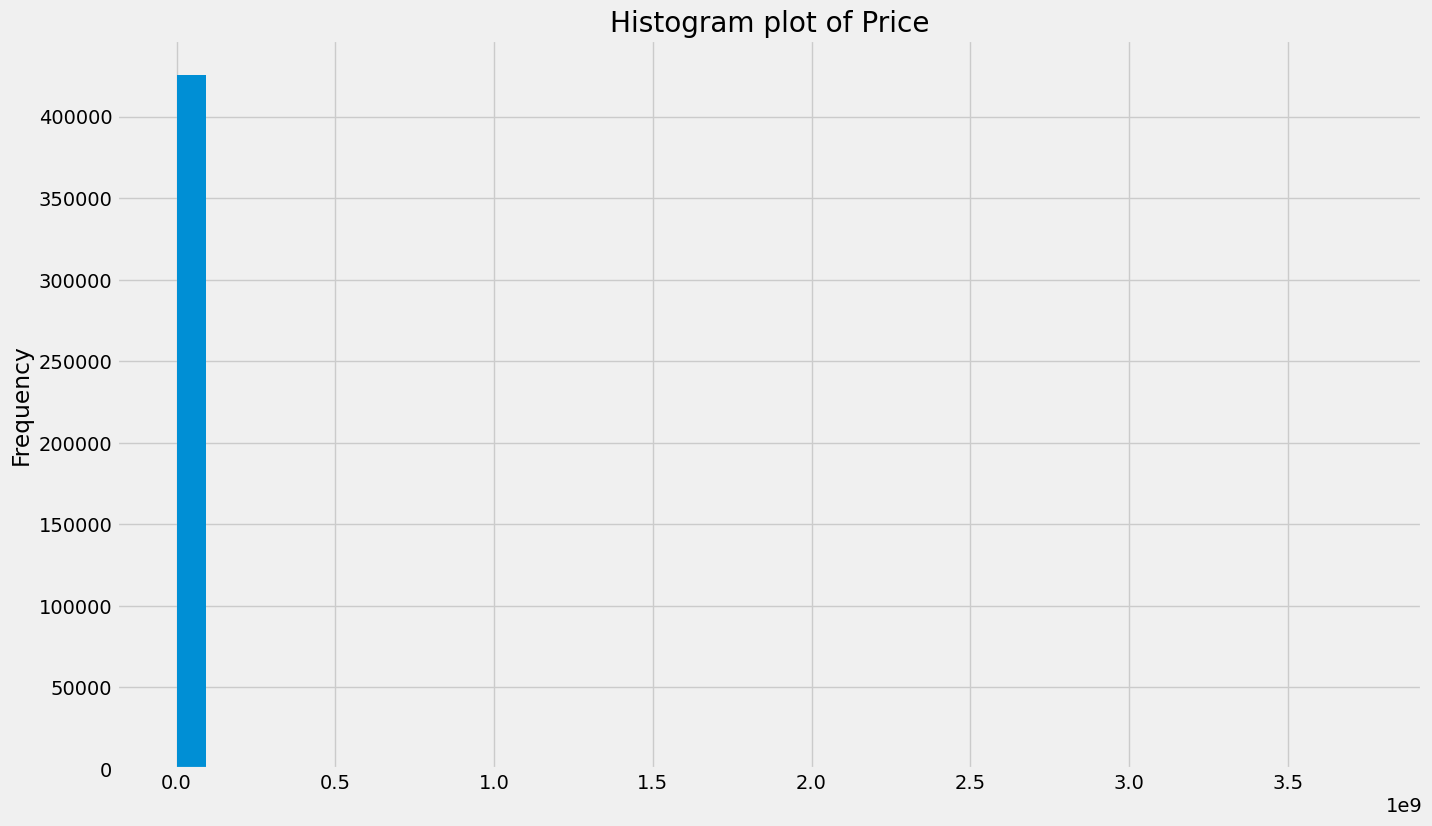

In [28]:
df['price'].plot(kind = 'hist', bins = 40, title = "Histogram plot of Price");

In [29]:
df["price_log"] = np.log(df['price'])


In [30]:
df.head(3)

,id,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,price_log
27,7316814884,33590,10.00,good,8,gas,57923.00,clean,other,4wd,pickup,10.42
28,7316814758,22590,14.00,good,8,gas,71229.00,clean,other,4wd,pickup,10.03
29,7316814989,39590,4.00,good,8,gas,19160.00,clean,other,4wd,pickup,10.59


Outlier Treatment

In [31]:
#Q1 = df['price'].quantile(0.25)
#Q3 = df['price'].quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Cap values outside the bounds
#df['price'] = df['price'].clip(lower=lower_bound, upper=upper_bound)

In [32]:
df_zscore = df[np.abs(stats.zscore(df['price'])) < 3].copy()

In [33]:
df_zscore.shape

(425655, 12)

In [34]:
zscore_data_lost = 1-(df_zscore.shape[0]/df.shape[0])
print("We lost {:.2%} of the data by the z-score method".format(zscore_data_lost))

We lost 0.00% of the data by the z-score method


In [35]:
print(df_zscore['price'].describe())
df['price'].describe()

count     425655.00
mean       17833.85
std        73145.14
min            0.00
25%         5900.00
50%        13900.00
75%        26000.00
max     25003000.00
Name: price, dtype: float64


count       425675.00
mean         75305.64
std       12199512.60
min              0.00
25%           5900.00
50%          13900.00
75%          26000.00
max     3736928711.00
Name: price, dtype: float64

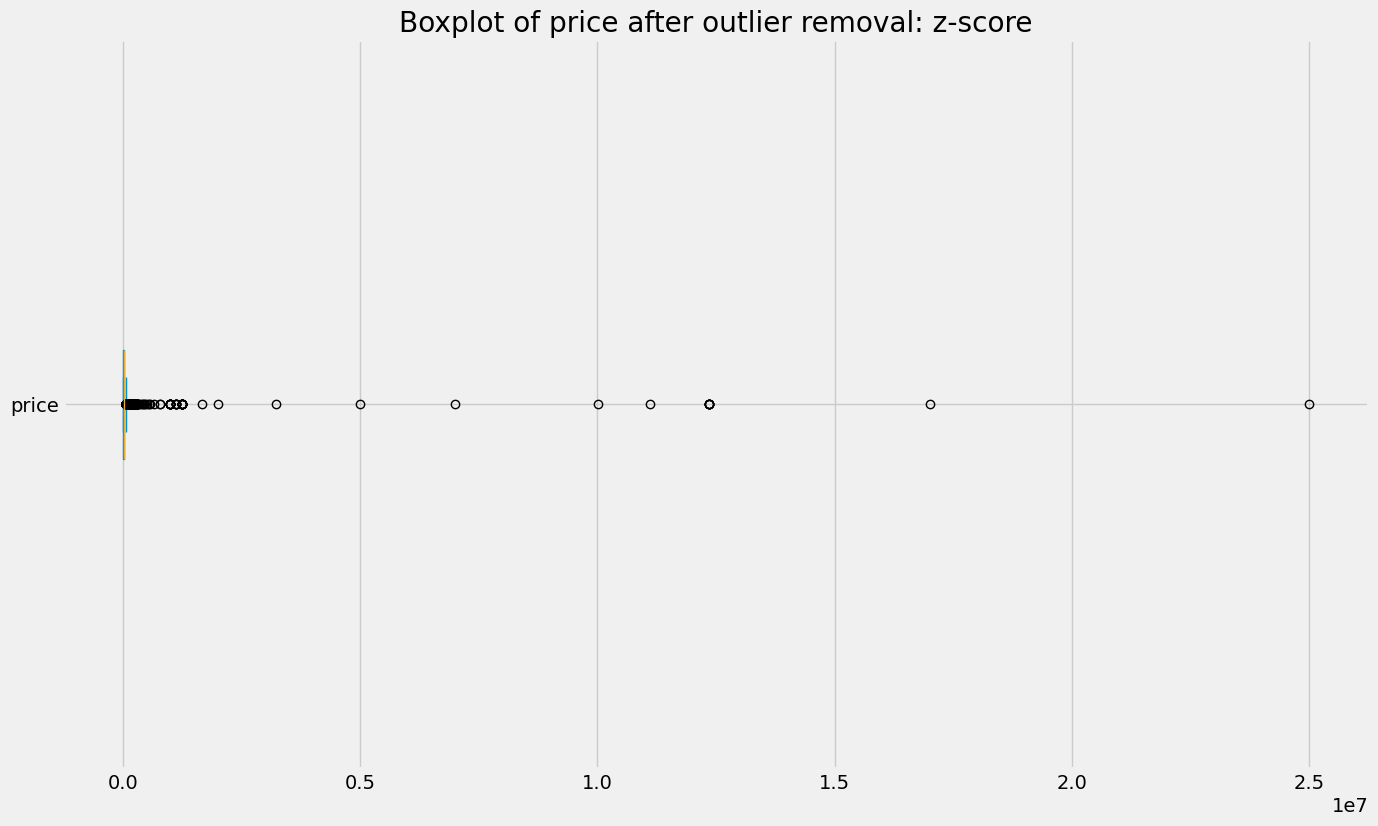

In [36]:
df_zscore['price'].plot(kind = 'box', vert = False, title = "Boxplot of price after outlier removal: z-score");

Bivariate Analysis

In [37]:
corr = df.corr(numeric_only = True)

<Axes: >

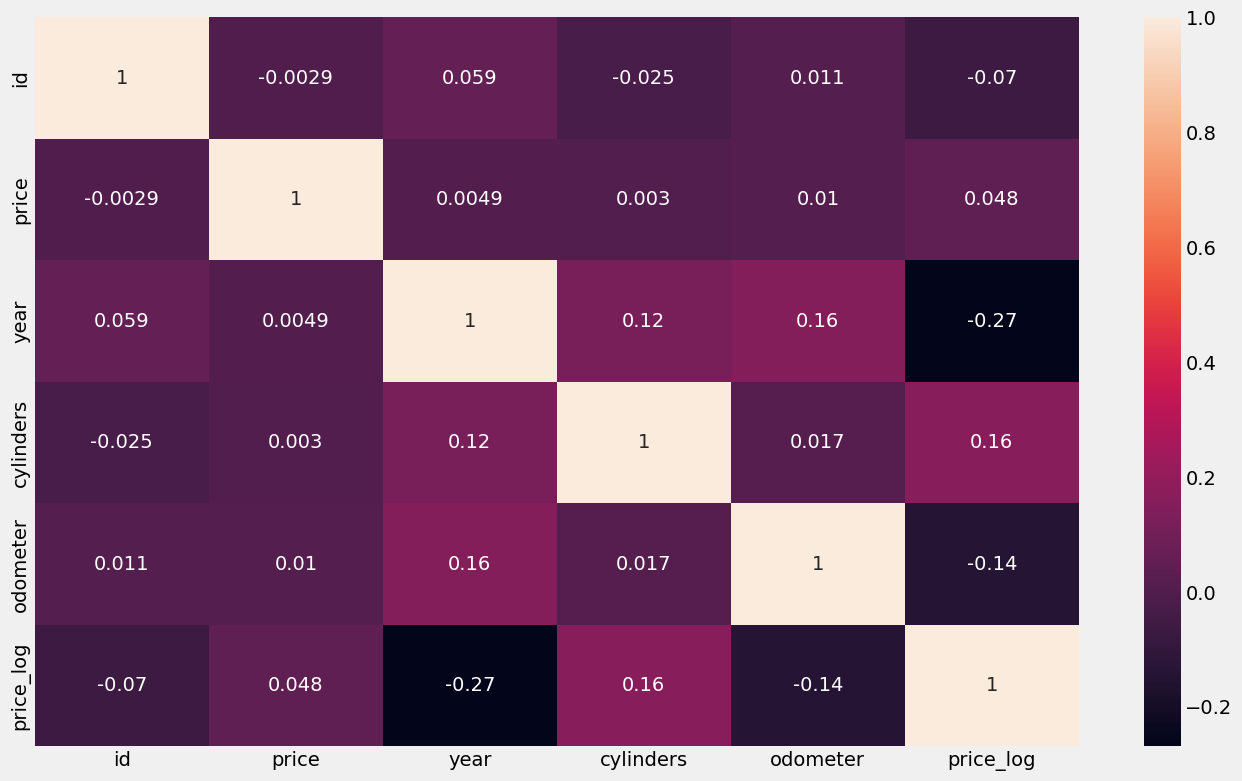

In [38]:
sns.heatmap(corr, annot = True)

In [39]:
mask = np.triu(np.ones_like(df.corr(numeric_only = True).round(2)))

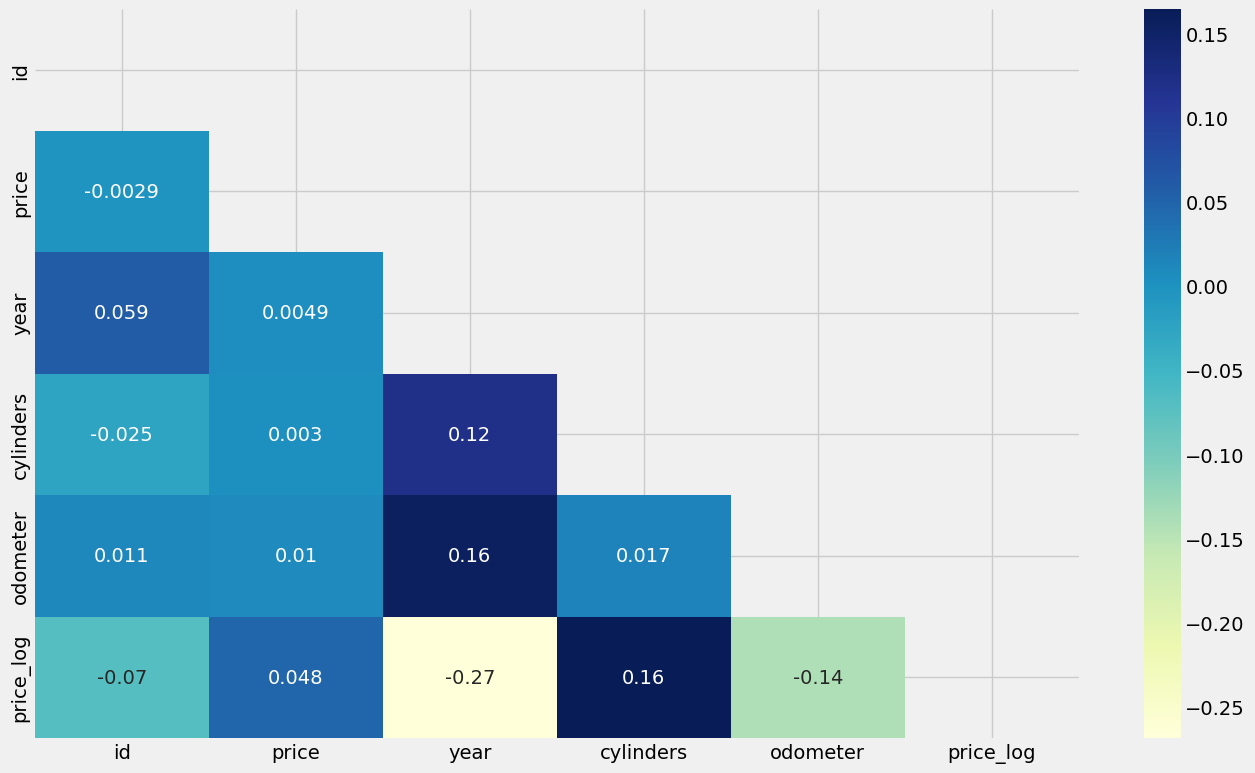

In [40]:
sns.heatmap(corr, annot=True, mask=mask, cmap="YlGnBu");


Categorical Value Relationship

In [41]:
df['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [42]:
df['fuel'].nunique()

5

In [43]:
df.groupby('fuel')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
fuel,,,,,,,,
diesel,29927.00,118399.32,10401958.68,0.00,11000.00,27990.00,44850.00,1410065407.00
electric,1695.00,24630.70,17204.04,0.00,11590.00,22499.00,36590.00,130000.00
gas,358171.00,73547.14,12789895.51,0.00,5495.00,11997.00,23591.00,3736928711.00
hybrid,5165.00,14565.79,11469.59,0.00,6500.00,11995.00,19990.00,109999.00
other,30717.00,66834.64,7044306.72,0.00,16498.00,25990.00,33990.00,1234567890.00


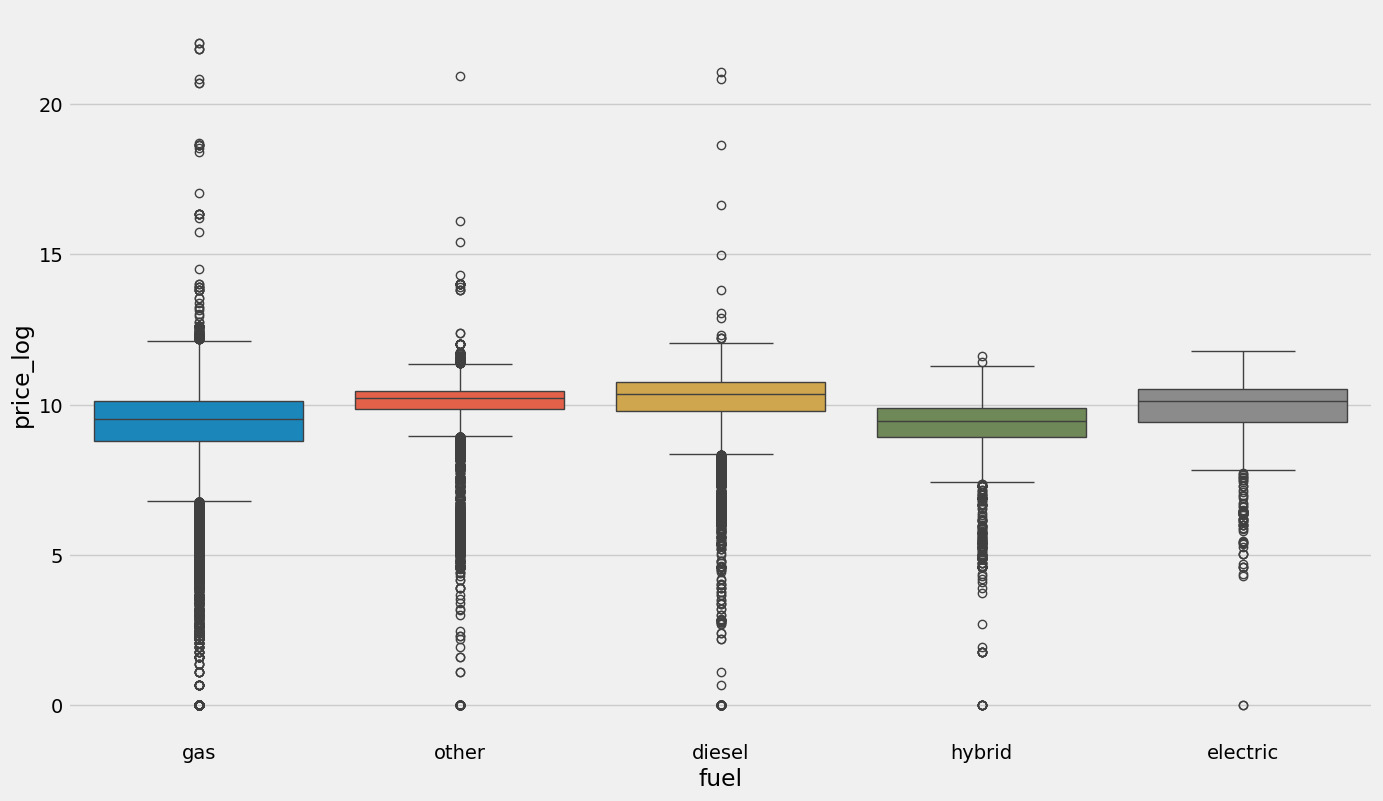

In [44]:
sns.boxplot(x = 'fuel', y = 'price_log', data = df, hue = "fuel");

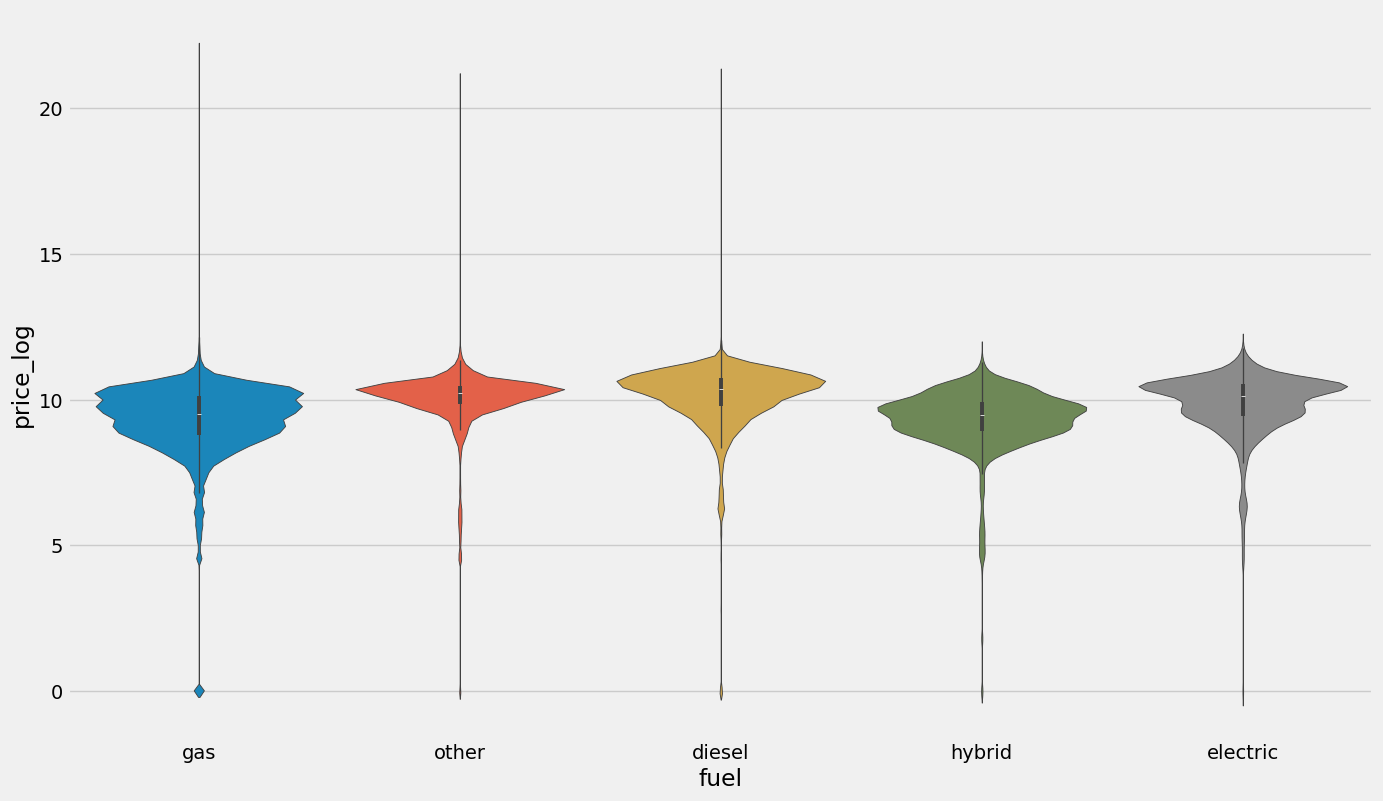

In [45]:
sns.violinplot(x = 'fuel', y = 'price_log', data = df, hue = "fuel");

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425675 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            425675 non-null  int64  
 1   price         425675 non-null  int64  
 2   year          425675 non-null  float64
 3   condition     425675 non-null  object 
 4   cylinders     425675 non-null  Int64  
 5   fuel          425675 non-null  object 
 6   odometer      425675 non-null  float64
 7   title_status  425675 non-null  object 
 8   transmission  425675 non-null  object 
 9   drive         425675 non-null  object 
 10  type          425675 non-null  object 
 11  price_log     425675 non-null  float64
dtypes: Int64(1), float64(3), int64(2), object(6)
memory usage: 42.6+ MB


In [47]:
df.select_dtypes(['int', 'float']).drop(columns = {'price_log', 'id'}).head(3);
numeric_cols = df.select_dtypes(['int', 'float']).drop(columns = {'price_log', 'id'}).columns.tolist();

In [48]:
numeric_cols 

['price', 'year', 'cylinders', 'odometer']

In [49]:
df_numeric = df[numeric_cols].copy()
df_numeric.head()

,price,year,cylinders,odometer
27,33590,10.00,8,57923.00
28,22590,14.00,8,71229.00
29,39590,4.00,8,19160.00
30,30990,7.00,8,41124.00
31,15000,11.00,6,128000.00


Splitting Data

In [50]:
X = df_numeric.drop(columns = 'price')
y = df_numeric['price']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [53]:
print(X_train.shape)
print(X_test.shape)

print("=" * 50)

print(y_train.shape)
print(y_test.shape)

(340540, 3)
(85135, 3)
(340540,)
(85135,)


In [54]:
print(X_train.isna().sum())

year         0
cylinders    0
odometer     0
dtype: int64


In [55]:
print(X_test.isna().sum())

year         0
cylinders    0
odometer     0
dtype: int64


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Linear Regression Numerical Value

In [56]:
y.mean().round(1) # average value of car price


np.float64(75305.6)

In [57]:
dummy = DummyRegressor()

In [58]:
# fit the model
dummy.fit(X_train, y_train)

# R^2 of the model
dummy_r2 = dummy.score(X_train, y_train)
print("The value of dummy_r2 is {:.2f}".format(dummy_r2))

# Predictions on test 
dummy_predict = dummy.predict(X_test)

# rmse
dummy_rmse = mean_squared_error(y_test, dummy_predict, squared = False)
print("The value of dummy rmse is {:.2f}".format(dummy_rmse))

The value of dummy_r2 is 0.00
The value of dummy rmse is 13912722.96


In [59]:
x = list(range(0, len(y_test)))

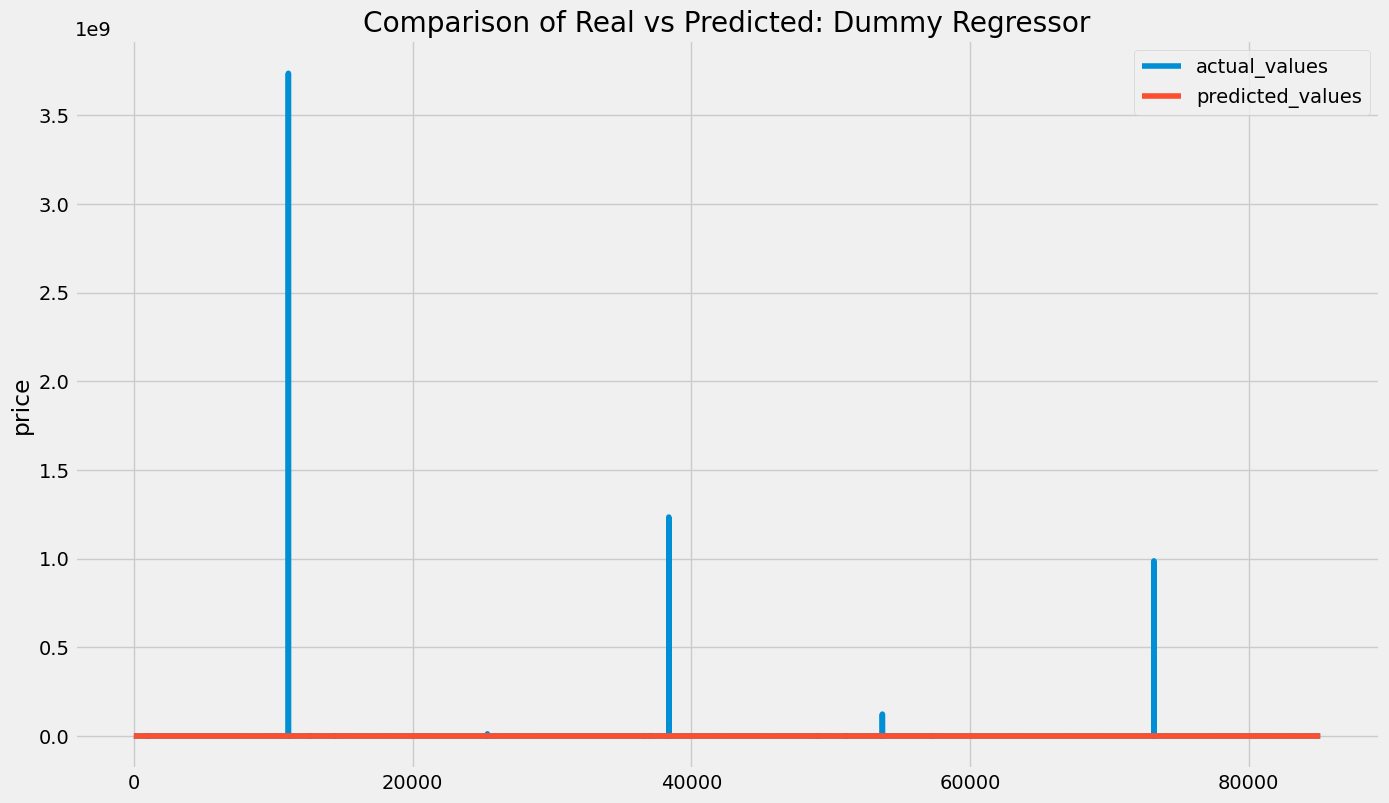

In [60]:
sns.lineplot(x = x, y = y_test, label = 'actual_values');
sns.lineplot(x = x, y = dummy_predict, label = 'predicted_values');

plt.title("Comparison of Real vs Predicted: Dummy Regressor");

In [61]:
lr = LinearRegression()

In [62]:
# fit the model
lr.fit(X_train, y_train)

# R^2 of the model
lr_r2 = (lr.score(X_train, y_train))
print("The value of lr_r2 is {:.2f}".format(lr_r2))

# Predictions on test 
lr_predict = lr.predict(X_test)

# rmse
lr_rmse = mean_squared_error(y_test, lr_predict, squared = False)
print("The value of lr rmse is {:.2f}".format(lr_rmse))

The value of lr_r2 is 0.00
The value of lr rmse is 13912177.82


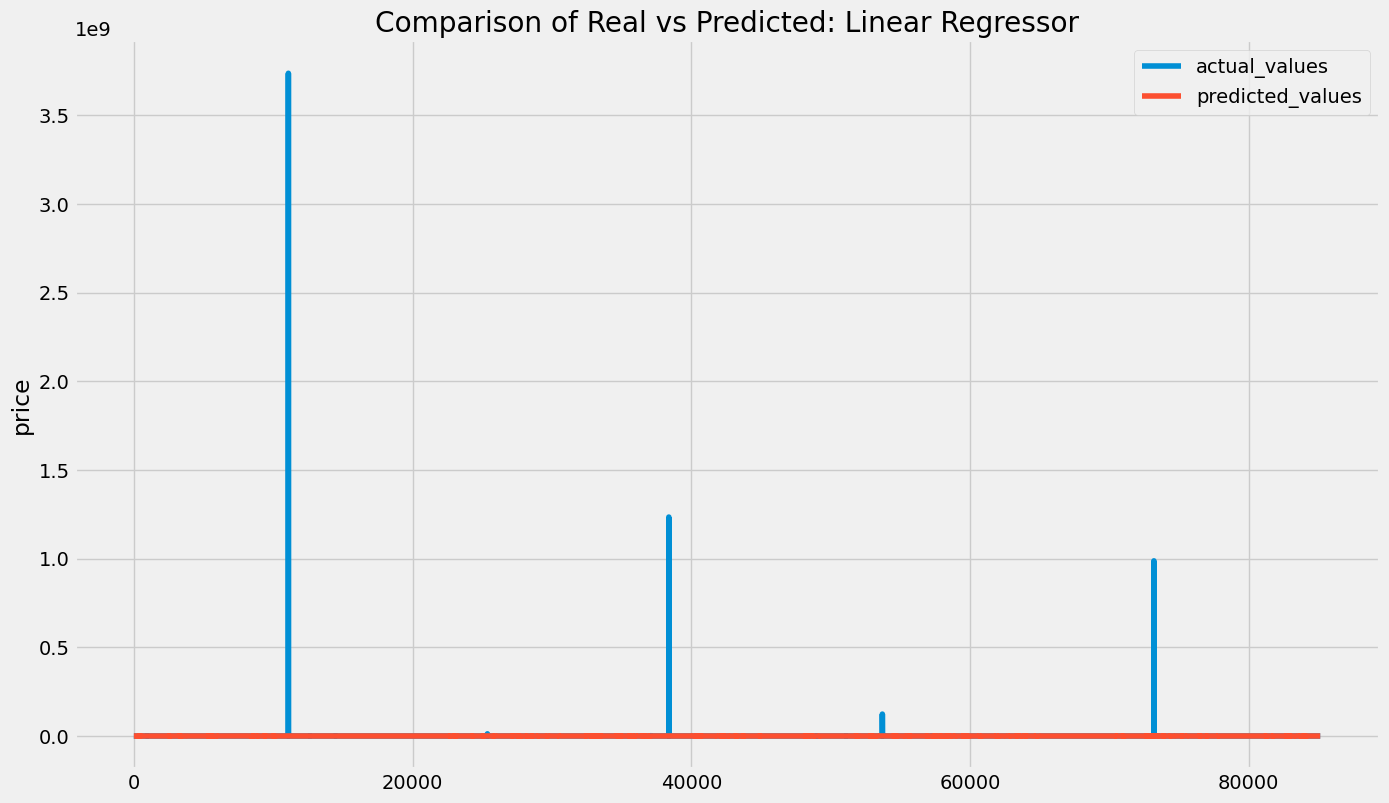

In [63]:
sns.lineplot(x = x, y = y_test, label = "actual_values");
sns.lineplot(x = x, y = lr_predict, label = "predicted_values");

plt.title("Comparison of Real vs Predicted: Linear Regressor");

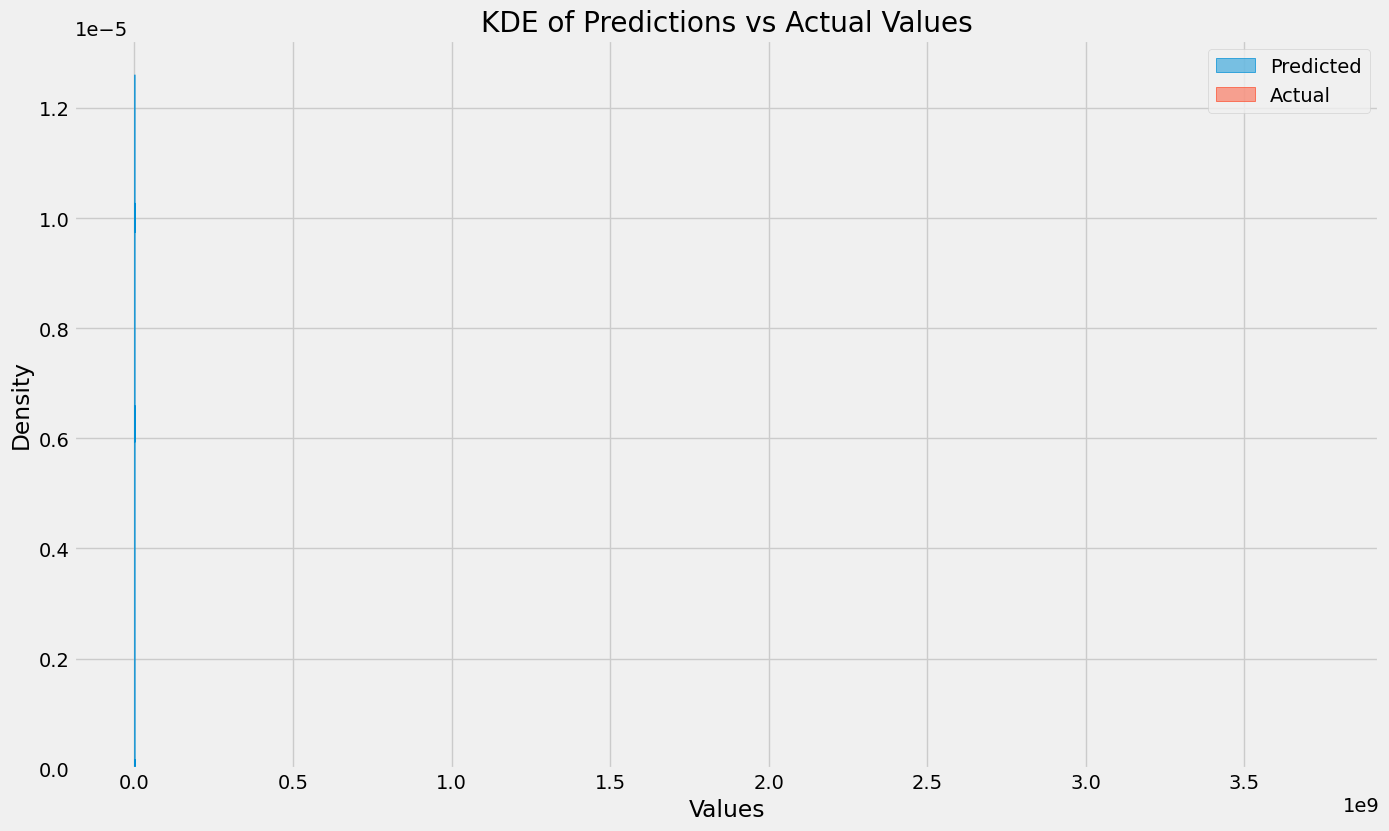

In [64]:
sns.kdeplot(lr_predict, label='Predicted', fill=True, alpha=0.5, bw_adjust=0.5);
sns.kdeplot(y_test, label='Actual', fill=True, alpha=0.5, bw_adjust=0.5);

plt.title("KDE of Predictions vs Actual Values");
plt.xlabel("Values");
plt.ylabel("Density");
plt.legend();
plt.show();

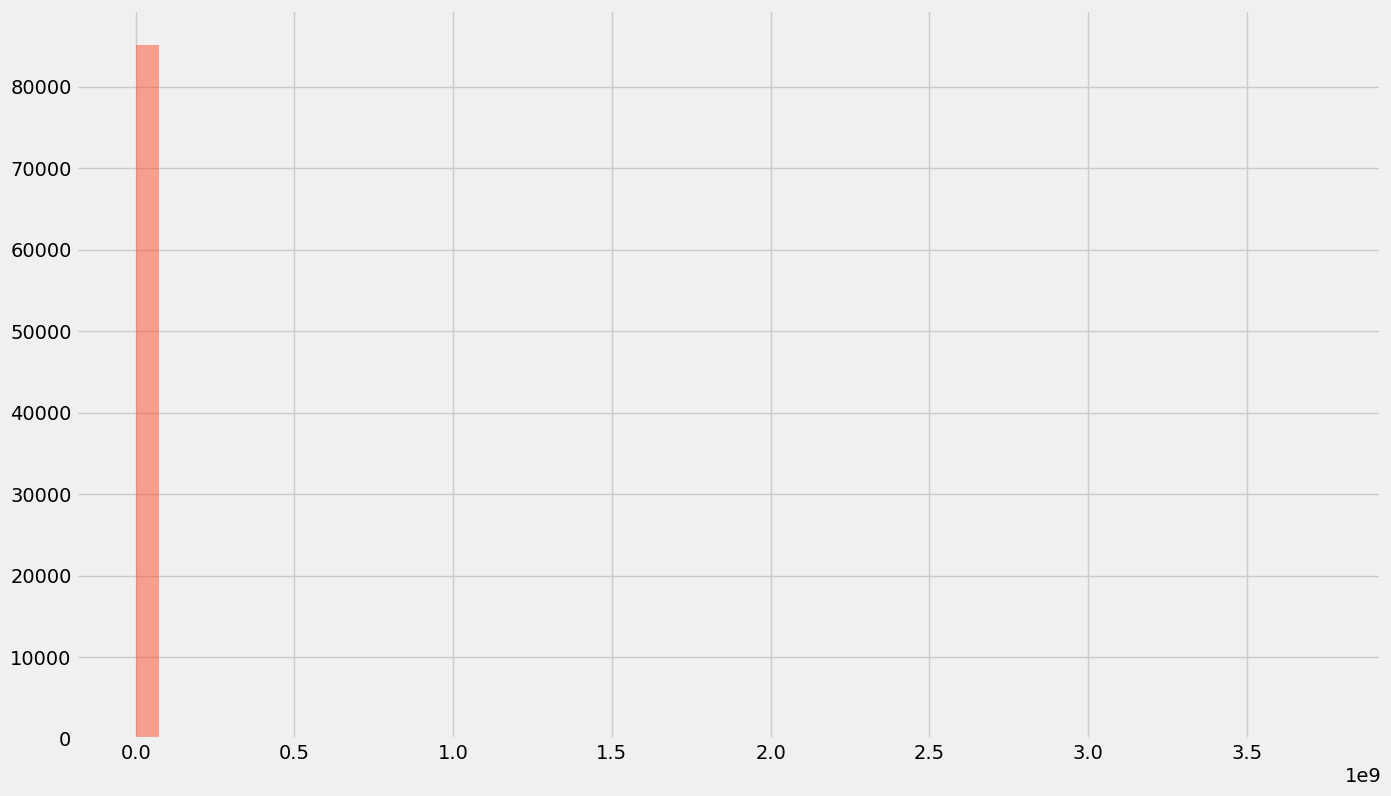

In [65]:
plt.hist(lr_predict, alpha = 0.5, bins= 50);
plt.hist(y_test, alpha = 0.5, bins = 50);

Coefficients

,Coefficients
year,5311.50
cylinders,17106.70
odometer,0.00


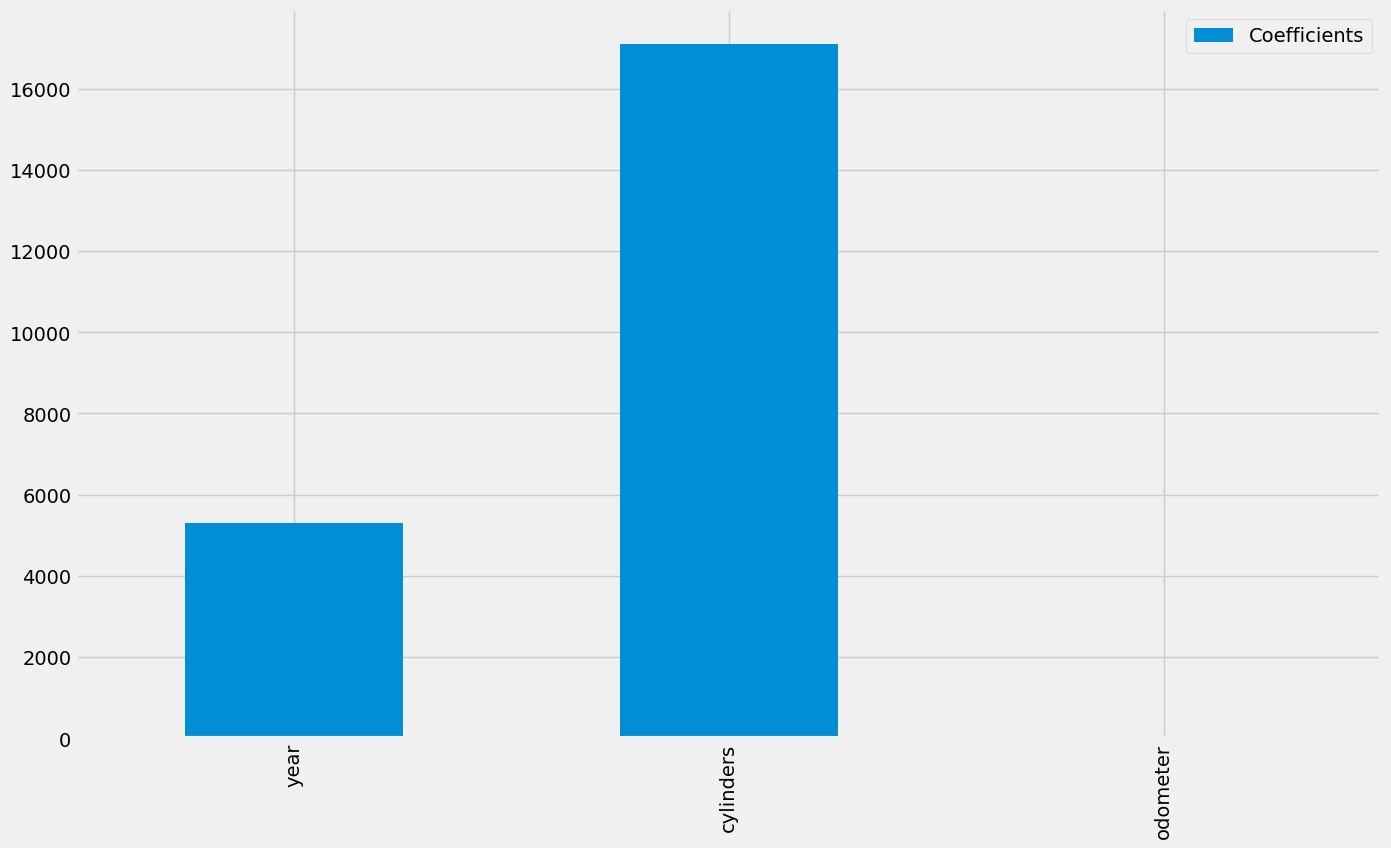

In [66]:
coeffs = pd.DataFrame(np.round(lr.coef_,1), X_train.columns, columns = ["Coefficients"])
display(coeffs)
coeffs.plot(kind = "bar");

Linear Regression Categorical Value

In [67]:
df.select_dtypes("object").shape

(425675, 6)

In [68]:
df.select_dtypes("object").columns

Index(['condition', 'fuel', 'title_status', 'transmission', 'drive', 'type'], dtype='object')

In [69]:
df.select_dtypes("object").agg(["nunique"])

,condition,fuel,title_status,transmission,drive,type
nunique,6,5,6,3,3,13


In [70]:
df_encoded = pd.get_dummies(df, columns=['drive'], drop_first=True)

print(df_encoded)

                id  price  year  condition  cylinders    fuel  odometer  \
27      7316814884  33590 10.00       good          8     gas  57923.00   
28      7316814758  22590 14.00       good          8     gas  71229.00   
29      7316814989  39590  4.00       good          8     gas  19160.00   
30      7316743432  30990  7.00       good          8     gas  41124.00   
31      7316356412  15000 11.00  excellent          6     gas 128000.00   
...            ...    ...   ...        ...        ...     ...       ...   
426875  7301591192  23590  5.00       good          6     gas  32226.00   
426876  7301591187  30590  4.00       good          6     gas  12029.00   
426877  7301591147  34990  4.00       good          6  diesel   4174.00   
426878  7301591140  28990  6.00       good          6     gas  30112.00   
426879  7301591129  30590  5.00       good          6     gas  22716.00   

       title_status transmission       type  price_log  drive_fwd  drive_rwd  
27            clean 

In [71]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['drive_encoded'] = encoder.fit_transform(df['drive'])

In [72]:
X = df_encoded[['drive_fwd', 'drive_fwd']]  # Use one-hot encoded features
y = df_encoded['price']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Get predictions
predictions = model.predict(X)

print("Predictions:", predictions)

Predictions: [95060.61149153 95060.61149153 95060.61149153 ... 95060.61149153
 15078.11149153 95060.61149153]


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Metrics for Regression

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Visualization

Report Findings